In [1]:
from glob import glob
import os
import re
import numpy as np
import scipy.misc
import matplotlib.pyplot as plt

In [21]:
data_folder = '../data/data_road/training'
image_shape = (160, 576)

image_paths = glob(os.path.join(data_folder, 'image_2', '*.png'))
label_paths = {
            re.sub(r'_(lane|road)_', '_', os.path.basename(path)): path
            for path in glob(os.path.join(data_folder, 'gt_image_2', '*_road_*.png'))}
background_color = np.array([255, 0, 0])

In [22]:
label_paths

{'um_000000.png': '../data/data_road/training/gt_image_2/um_road_000000.png',
 'um_000001.png': '../data/data_road/training/gt_image_2/um_road_000001.png',
 'um_000002.png': '../data/data_road/training/gt_image_2/um_road_000002.png',
 'um_000003.png': '../data/data_road/training/gt_image_2/um_road_000003.png',
 'um_000004.png': '../data/data_road/training/gt_image_2/um_road_000004.png',
 'um_000005.png': '../data/data_road/training/gt_image_2/um_road_000005.png',
 'um_000006.png': '../data/data_road/training/gt_image_2/um_road_000006.png',
 'um_000007.png': '../data/data_road/training/gt_image_2/um_road_000007.png',
 'um_000008.png': '../data/data_road/training/gt_image_2/um_road_000008.png',
 'um_000009.png': '../data/data_road/training/gt_image_2/um_road_000009.png',
 'um_000010.png': '../data/data_road/training/gt_image_2/um_road_000010.png',
 'um_000011.png': '../data/data_road/training/gt_image_2/um_road_000011.png',
 'um_000012.png': '../data/data_road/training/gt_image_2/um_road

In [23]:
image_paths

['../data/data_road/training/image_2/umm_000022.png',
 '../data/data_road/training/image_2/uu_000074.png',
 '../data/data_road/training/image_2/um_000011.png',
 '../data/data_road/training/image_2/um_000022.png',
 '../data/data_road/training/image_2/umm_000037.png',
 '../data/data_road/training/image_2/uu_000079.png',
 '../data/data_road/training/image_2/umm_000067.png',
 '../data/data_road/training/image_2/umm_000025.png',
 '../data/data_road/training/image_2/umm_000010.png',
 '../data/data_road/training/image_2/umm_000055.png',
 '../data/data_road/training/image_2/um_000053.png',
 '../data/data_road/training/image_2/um_000086.png',
 '../data/data_road/training/image_2/um_000029.png',
 '../data/data_road/training/image_2/umm_000000.png',
 '../data/data_road/training/image_2/um_000063.png',
 '../data/data_road/training/image_2/uu_000059.png',
 '../data/data_road/training/image_2/umm_000060.png',
 '../data/data_road/training/image_2/uu_000081.png',
 '../data/data_road/training/image_2/u

In [24]:
image_file = image_paths[3]
print(image_file)

../data/data_road/training/image_2/um_000022.png


In [25]:
gt_image_file = label_paths[os.path.basename(image_file)]
print(gt_image_file)

../data/data_road/training/gt_image_2/um_road_000022.png


In [26]:
image = scipy.misc.imresize(scipy.misc.imread(image_file), image_shape)
gt_image = scipy.misc.imresize(scipy.misc.imread(gt_image_file), image_shape)

/home/dhruva/anaconda3/envs/carnd-term3/lib/python3.5/site-packages/ipykernel_launcher.py:1: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  """Entry point for launching an IPython kernel.
/home/dhruva/anaconda3/envs/carnd-term3/lib/python3.5/site-packages/ipykernel_launcher.py:1: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  """Entry point for launching an IPython kernel.
/home/dhruva/anaconda3/envs/carnd-term3/lib/python3.5/site-packages/ipykernel_launcher.py:2: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  
/home/dhruva/anaconda3/envs/carnd-term3/lib/python3.5/site-packages/ipykernel_launcher.py:2: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in Sc

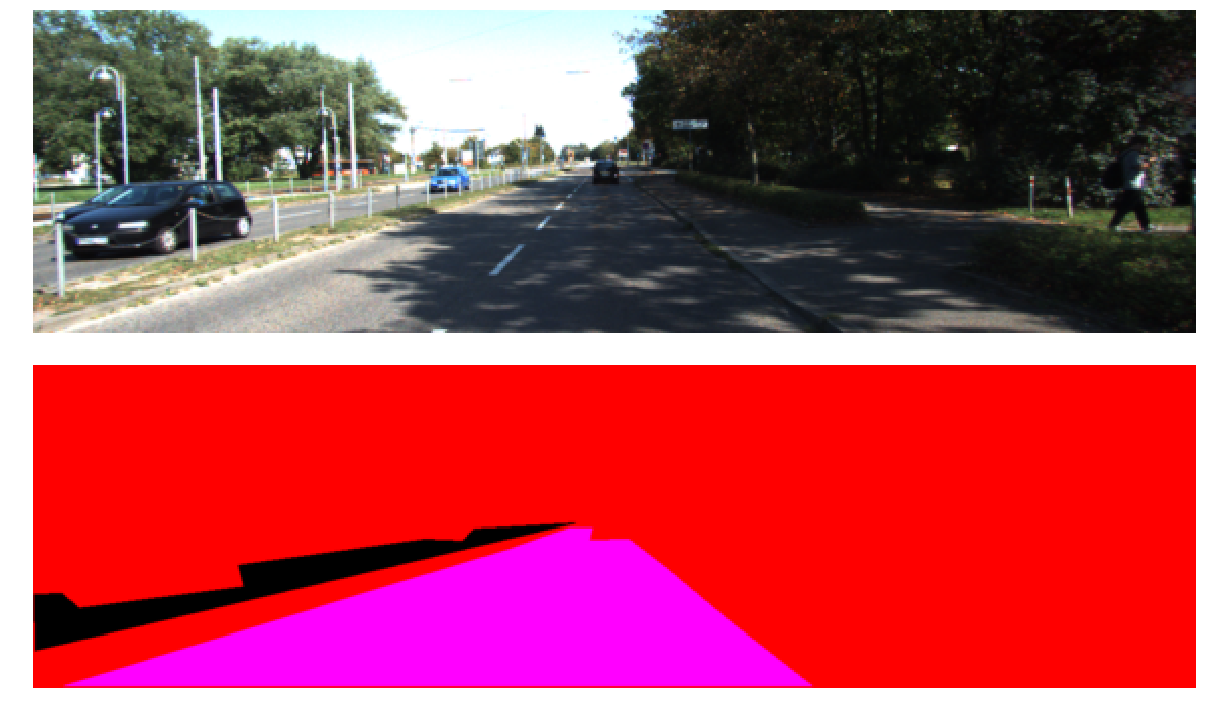

In [27]:
# plot them
def plott(img, gt):
    f, axs = plt.subplots(2, 1, figsize=(20,10))
    f.tight_layout()

    axs[0].imshow(img)
    axs[0].axis('off')
    axs[1].imshow(gt)
    axs[1].axis('off')
    # axs[i].set_title(fname, fontsize=10)
    
plott(image, gt_image)

In [28]:
gt_bg = np.all(gt_image == background_color, axis=2)
# plt.imshow(gt_bg, cmap='gray')
gt_bg = gt_bg.reshape(*gt_bg.shape, 1)
gt_image = np.concatenate((gt_bg, np.invert(gt_bg)), axis=2)
np.shape(gt_bg)

(160, 576, 1)

(-0.5, 575.5, 159.5, -0.5)

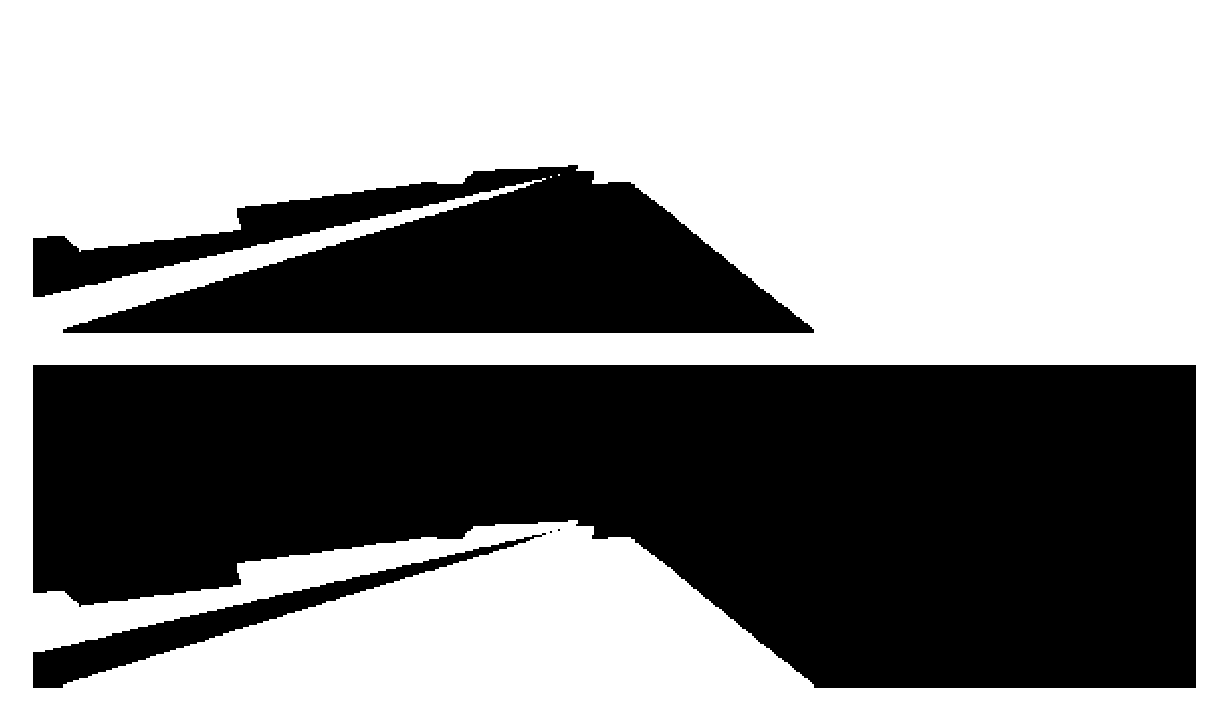

In [78]:
f, axs = plt.subplots(2, 1, figsize=(20,10))
f.tight_layout()

# non road label
axs[0].imshow(gt_image[:,:,0], cmap='gray')
axs[0].axis('off')
# road label
axs[1].imshow(gt_image[:,:,1], cmap='gray')
axs[1].axis('off')

In [31]:
image.dtype

dtype('uint8')

In [4]:
import tensorflow as tf

/home/dhruva/anaconda3/envs/carnd-term3/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [8]:
correct_label = tf.placeholder(tf.float32, [None, *image_shape, 2])

In [9]:
correct_label

<tf.Tensor 'Placeholder_1:0' shape=(?, 160, 576, 2) dtype=float32>

In [10]:
EPOCHS = 10
l = 1000
print(EPOCHS*l/64)

156.25
